In [1]:
import sys
sys.path.append('/Users/mehmetbezcioglu/Documents/SEMESTER1/DeepLearning')
import numpy as np
import matplotlib.pyplot as plt
from eigen_face.matlab import EigenFace

In [2]:
face = EigenFace(path='/Users/mehmetbezcioglu/Documents/SEMESTER1/DeepLearning/eigen_face/Dataset')

In [3]:
print(face)
face.project_data(dim=400)
face.recover_data()
print("test accuracy:{}\none_shot accuracy:{}".format(face.get_test_acc(),face.get_one_shot_acc()))


train_images:(30, 2576)
test_images:(270, 2576)
train_labels:(1, 30)
test_labels:(1, 270)
one_shot_images:(90, 2576)
one_shot_labels:(1, 90)
concat_images:(40, 2576)
concat_labels:(1, 40)
covariance matrix shape:(2576, 2576)
projected training images shape:(400, 30)
test accuracy:0.7851851851851852
one_shot accuracy:0.7777777777777778


In [6]:
print(face.one_shot_labels)
print(face._concat_labels)
print(face._projected_concat_train_one_shot.shape)

[[ 1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  5  5  5  5  5  5
   5  5  5  6  6  6  6  6  6  6  6  6 24 24 24 24 24 24 24 24 24 26 26 26
  26 26 26 26 26 26 29 29 29 29 29 29 29 29 29 30 30 30 30 30 30 30 30 30
  31 31 31 31 31 31 31 31 31 36 36 36 36 36 36 36 36 36]]
[[ 1  2  5  6 24 26 29 30 31 36  3  4  7  8  9 10 11 12 13 14 15 16 17 18
  19 20 21 22 23 25 27 28 32 33 34 35 37 38 39 40]]
(400, 40)


## Modify the dataset

-  change the labels in the one_shot_labels by adding an offset of 30
-  form a new one shot set of shape=(90,2576) and project it on the eigenfaces
-  form a new dataset called train_one_shot_concat of shape=(40,2576) where the first (30,2576) come from training set and the remaining (10,2576) come from one_shot set.

In [5]:
print(face.one_shot_labels)
print(face.concat_labels)

[[ 1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  5  5  5  5  5  5
   5  5  5  6  6  6  6  6  6  6  6  6 24 24 24 24 24 24 24 24 24 26 26 26
  26 26 26 26 26 26 29 29 29 29 29 29 29 29 29 30 30 30 30 30 30 30 30 30
  31 31 31 31 31 31 31 31 31 36 36 36 36 36 36 36 36 36]]
[[ 1  2  5  6 24 26 29 30 31 36]]


In [13]:
print(face.test_labels)
print(face.train_labels)

[[ 3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  7  7  7  7  7  7
   7  7  7  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9 10 10 10
  10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 12 12 12 12 12 12 12 12 12
  13 13 13 13 13 13 13 13 13 14 14 14 14 14 14 14 14 14 15 15 15 15 15 15
  15 15 15 16 16 16 16 16 16 16 16 16 17 17 17 17 17 17 17 17 17 18 18 18
  18 18 18 18 18 18 19 19 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20 20
  21 21 21 21 21 21 21 21 21 22 22 22 22 22 22 22 22 22 23 23 23 23 23 23
  23 23 23 25 25 25 25 25 25 25 25 25 27 27 27 27 27 27 27 27 27 28 28 28
  28 28 28 28 28 28 32 32 32 32 32 32 32 32 32 33 33 33 33 33 33 33 33 33
  34 34 34 34 34 34 34 34 34 35 35 35 35 35 35 35 35 35 37 37 37 37 37 37
  37 37 37 38 38 38 38 38 38 38 38 38 39 39 39 39 39 39 39 39 39 40 40 40
  40 40 40 40 40 40]]
[[ 3  4  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 25 27 28 32 33
  34 35 37 38 39 40]]


In [11]:
# face.one_shot_images[::10,:].shape
concat_set = np.concatenate((face.concat_train_one_shot,face.train_images[:,:]),axis=0)
concat_set_labels = np.concatenate((face.concat_labels,face.train_labels),axis=1)

In [12]:
concat_set_labels.shape

(1, 40)

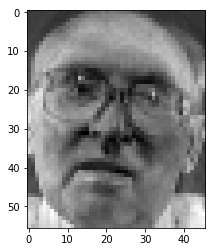

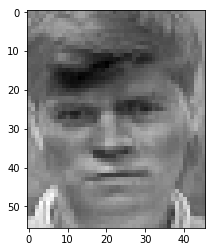

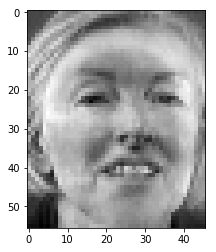

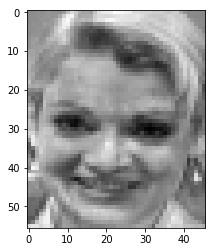

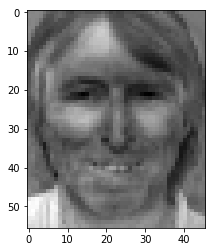

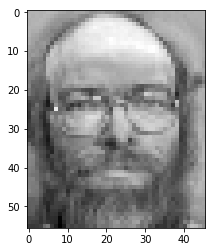

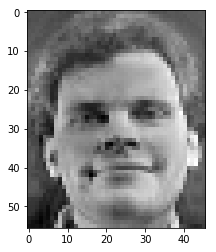

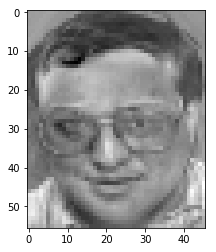

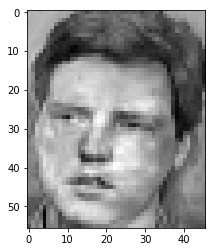

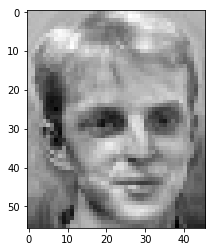

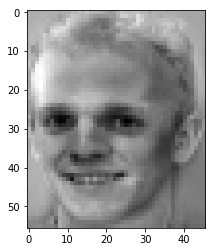

In [7]:
for i in range(11):
    plt.imshow(concat_set[i,:].reshape(56,46),cmap='gray')
    plt.show()


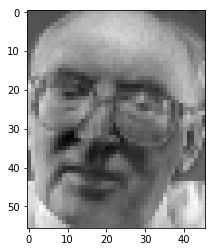

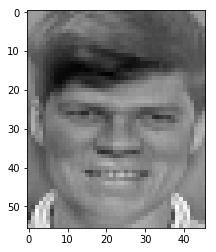

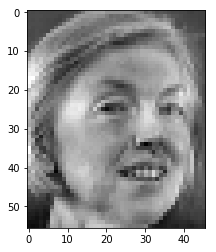

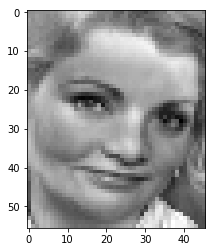

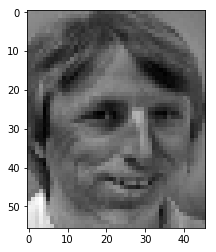

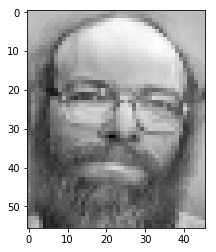

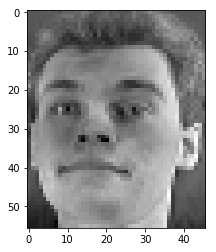

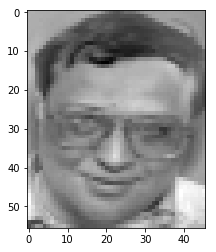

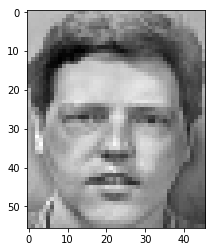

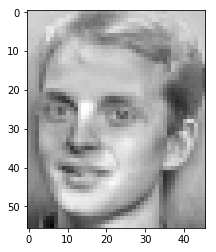

In [10]:
for i in range(0,90,9):
    plt.imshow(face.one_shot_images[i,:].reshape(56,46),cmap='gray')
    plt.show()